# Q1.b Preprocessing

The first step is to preprocess the data. As you know, DNA is encoded in A's, T's, G's and C's, and our data are in the form of a string consisting of these nucleotides. Unfortunately our machine learning models cannot work with strings, so we need to convert the DNA sequences into a format that can be used for machine learning. We will use a technique called one-hot encoding to convert the DNA sequences into a matrix of 0's and 1's. In this matrix each column will represent a nucleotide (A, T, G, C) and each row will represent a position in the promoter sequence. The value of each element in the matrix will be 1 if the nucleotide at that position is the same as the column and 0 otherwise.

Our data is stored in a simple text file, so we will need to write a some code to process our data. Copy and run this code in Google colab:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

# read in the MPRA data
data = pd.read_csv("/content/drive/MyDrive/BMEG424-Assign5/MPRA_data_2025.txt", sep='\t', header=None)
# rename the columns
data.columns = ['sequence', 'expression']
# set up the label binarizer from sklearn
lb = LabelBinarizer()
lb.fit(list('ACGT'))
# function for one hot encoding the data
def one_hot_encode(sequence):
    return lb.transform(list(sequence))
# one hot encode the sequence
data['ohc_sequence'] = data['sequence'].apply(one_hot_encode) # this line is using the pandas apply function to run the one_hot_encode function on each row of the dataframe
# preview result
print("Preprocessed data preview: ")
print(data.head())

Preprocessed data preview: 
                                            sequence  expression  \
0  CTCCGGCCCTATGCAATCGAGTTATTGCGAGTGCGTTATTGGGAAC...       0.555   
1  ATTCAAATCTTACTTTTCAGTATAGGAGTTTCTTGCGTAAACTGCT...       0.560   
2  TTGGTCCGGGGCTGACACCCCACCCACCGAAAGAGGCTGCACCAAA...       0.335   
3  TGAAGTTTGCAATAGAACCAGTCAAGATGGTTTCCCTAAAGATAGC...       0.655   
4  TGGGGGGAAGGTTTGGCTTAGGGTACGGGGTTAACAGTTTACAACG...       0.485   

                                        ohc_sequence  
0  [[0, 1, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0,...  
1  [[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0,...  
2  [[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [0,...  
3  [[0, 0, 0, 1], [0, 0, 1, 0], [1, 0, 0, 0], [1,...  
4  [[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0,...  


What are the dimensions of a single one-hot encoded sequence in your data?



In [3]:
data.shape # shape of entire data, col: sequence, expression, ohc_sequence

single_ohc_sequence = data['ohc_sequence'].iloc[5]
print("Dimensions of a single one-hot encoded sequence: ", single_ohc_sequence.shape)

print(data['ohc_sequence'].iloc[5])

Dimensions of a single one-hot encoded sequence:  (200, 4)
[[1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 

Generally in machine learning your data are split into X and y, where X is the data containing the features you will use to make predictions and y is the data containing the target you are trying to predict. In this case, X will be the one-hot encoded matrix and y will be the expression of the reporter gene. We also need to split the data into a training set, validation set and test set. The training set is used to fit the model, the validation set is used to tune the hyperparameters of the model and the test set is used to evaluate the performance of the model. We will use the `train_test_split` function from the `sklearn.model_selection` module to do this. Here is some code to get you started

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

# split the data into X and y
X = np.stack(data['ohc_sequence'])
y = data['expression'].values

# split the data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=24)

# save the data (if you are working on google colab your variables work across cells so you don't technically need to save the data, you can just use the variables in the next cell)
# however if you run into problems it will be easier for the instructor to help you if you have saved the data
#np.save('X_train.npy', X_train)
#np.save('X_val.npy', X_val)
#np.save('X_test.npy', X_test)
#np.save('y_train.npy', y_train)
#np.save('y_val.npy', y_val)
#np.save('y_test.npy', y_test)

What are the dimensions of your training, validation and test sets? Explain why the dimensions are what they are

In [5]:
print("Dimensions of training set: ", X_train.shape, y_train.shape)
print("Dimensions of validation set: ", X_val.shape, y_val.shape)
print("Dimensions of test set: ", X_test.shape, y_test.shape)

Dimensions of training set:  (6000, 200, 4) (6000,)
Dimensions of validation set:  (2000, 200, 4) (2000,)
Dimensions of test set:  (2000, 200, 4) (2000,)


#### c. Training a Simple Neural Network on our data

First we are going to train a simple neural network on our data. We will use the `Sequential` class from the `tensorflow.keras.models` module to create the model and the `Dense` class from the `tensorflow.keras.layers` module to create the layers of the model. We will use the `mean_squared_error` and `r2_score` functions from the `sklearn.metrics` module to evaluate the model.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

def create_simple_nn():
  input_shape = (200, 4)

  simple_nn = Sequential([
      Flatten(input_shape=input_shape),   # Flatten the input
      Dense(512, activation='relu'),      # Fully connected layer with 512 units
      Dense(256, activation='relu'),       # Fully connected layer with 256 units
      Dense(1)                            # Output layer with 1 unit (for regression)
  ])

  return simple_nn

#Enable GPU (Runtime->Change runtime type -> GPU)
import tensorflow as tf
assert tf.config.list_physical_devices('GPU')
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Create the model
simple_nn = create_simple_nn()
simple_nn.summary()
simple_nn.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 1e-2), loss='mse')

# Setup callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_simple_nn_model.weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

# Train the model
history = simple_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=1024, callbacks=[checkpoint], verbose=1)

# Evaluate the model
# Load the best weights
simple_nn.load_weights('best_simple_nn_model.weights.h5')
y_pred = simple_nn.predict(X_test)

# Print the R2 score
r2= r2_score(y_test, y_pred)
print("R2 score (simple Neural Network): ", r2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         410,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 541,697 (2.07 MB)

 Trainable params: 541,697 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.1511
Epoch 1: val_loss improved from inf to 0.10380, saving model to best_simple_nn_model.weights.h5
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - loss: 0.1486 - val_loss: 0.1038
Epoch 2/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1011
Epoch 2: val_loss improved from 0.10380 to 0.09103, saving model to best_simple_nn_model.weights.h5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0990 - val_loss: 0.0910
Epoch 3/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 0.0921
Epoch 3: val_loss improved from 0.09103 to 0.08512, saving model to best_simple_nn_model.weights.h5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0878 - val_loss: 0.0851
Epoch 4/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0791
Epoch 4: val_loss improved from 0.08512 to 0.07932, saving model to best_simple_nn_model.weights.h5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0798 - val_loss: 0.0793
Epoch 5/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 

#### d. Training a Convolutional Neural Network on our data

Now that we have tested the performance of a simple neural network on our data, we will try a more complex model. Convolutional neural networks (CNNs) are a type of neural network that are often used for image data. They are also used for sequence data, such as the DNA sequences in our data. We will use the `Conv1D` class from the `tensorflow.keras.layers` module to create the convolutional layers and the `MaxPooling1D` class to create the pooling layers.

Convolutions are simple mathematical operations where an array (your data) is multiplied by a filter (another array) to produce a third array. The filter is then moved across the array and the process is repeated. This has the effect of extracting features from the data. Maxpooling is a technique used to reduce the dimensions of the data. It works by taking the maximum value in a window of the data and discarding the rest.

If you'd like to read more about how CNN's work here is a good article [here](https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939).

Run the code below in Colab to train the CNN model and evaluate its performance

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from sklearn.metrics import mean_squared_error, r2_score

def create_CNN_model():
    model = Sequential([
    Conv1D(filters=32, kernel_size=17, activation='relu', input_shape=(X_train.shape[1], 4)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=17, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
  ])
    return model

# Create the model
CNN_model = create_CNN_model()
CNN_model.summary()
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4), loss='mse')

# Set up callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_CNN_model.weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

# Train the model
CNN_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=1024, callbacks=[checkpoint], verbose=1)

# Evaluate the model
# Load the best weights
CNN_model.load_weights('best_CNN_model.weights.h5')
y_pred = CNN_model.predict(X_test)

# Print the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 score (Conv Neural Network): ", r2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 184, 32)             │           2,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 92, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 76, 64)              │          34,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 38, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2432)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         155,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 192,865 (753.38 KB)

 Trainable params: 192,865 (753.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - loss: 0.1884
Epoch 1: val_loss improved from inf to 0.09546, saving model to best_CNN_model.weights.h5
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 766ms/step - loss: 0.1797 - val_loss: 0.0955
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0780
Epoch 2: val_loss improved from 0.09546 to 0.02810, saving model to best_CNN_model.weights.h5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0756 - val_loss: 0.0281
Epoch 3/50
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0280 
Epoch 3: val_loss improved from 0.02810 to 0.02189, saving model to best_CNN_model.weights.h5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0284 - val_loss: 0.0219
Epoch 4/50
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0166 
Epoch 4: val_loss improved from 0.02189 to 0.01110, saving model to best_CNN_model.weights.h5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0155 - val_loss: 0.0111
Epoch 5/50
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0117
Epoch 5: val_los

#### e. Baseline: Linear Regression

A good sanity check for any machine learning model is to compare its performance to a simple baseline model. In this case we will use linear regression as our baseline model. Linear regression is a simple model that assumes a linear relationship between the features and the target. We will use the `LinearRegression` class from the `sklearn.linear_model` module to fit a linear regression model to our data. Here is some code to get you started:

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create the model
reg = LinearRegression().fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Evaluate the model
y_pred = reg.predict(X_test.reshape(X_test.shape[0], -1))
# Save predictions to an npy file
np.save('y_pred_linearRegressor.npy', y_pred)
# Print the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

R2 score:  1.0


# 2. Unsupervised Learning: Clustering Single-Cell RNA-seq Data

#### b. Preprocessing/Dimensionality Reduction

Our aim is to cluster the cells based on their gene expression profiles. However, our data is currently is in the form of a counts matrix with dimensions 1500x2500 where each row represents a single cell and each column represents a single gene. To make the clustering easier we will first reduce the dimensionality of the data using principal component analysis (PCA). PCA is a technique that finds the directions in which the data varies the most and projects the data onto these directions. This has the effect of reducing the number of dimensions in the data while preserving as much of the variance in the data as possible. We will use the `PCA` class from the `sklearn.decomposition` module to do this. You can run the following code to load the data and perform PCA:

In [9]:
import h5py
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# import h5 data
with h5py.File("/content/drive/MyDrive/BMEG424-Assign5/scRNA_counts_2025.h5", 'r') as f:
    X = f['X'][:]
print(X[:5])

X = StandardScaler().fit_transform(X)
# Perform PCA
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

[[ 5  0  8 ...  0  9 19]
 [ 1  0  2 ...  0  3 27]
 [ 4  2 19 ...  0  0 32]
 [ 5  0 19 ...  0  0 15]
 [ 0  0  7 ...  0  7 34]]


We can easily visualize the results of the PCA using a scatter plot. We can use the `matplotlib` library to do this. Here is some code to get you started:

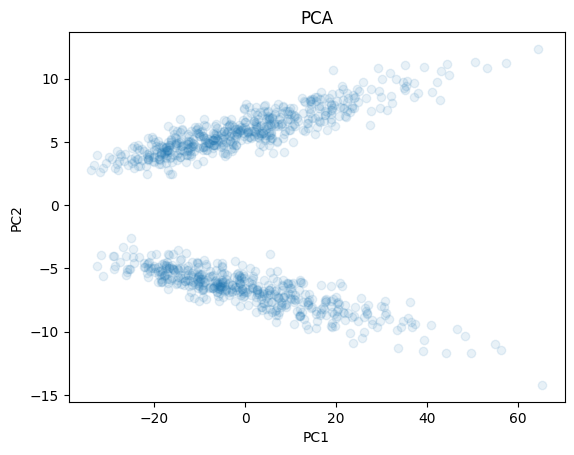

In [10]:
import matplotlib.pyplot as plt
# Plot the PCA
plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

#### d. Clustering (K-means, Hierarchical Clustering, DBSCAN)

Now we will attempt to cluster our data using three different clustering algorithms: K-means, hierarchical clustering and DBSCAN.

The first clustering algorithm we are going o use is K-means. K-means is a simple and fast clustering algorithm that is often used as a first step in clustering. It works by randomly initializing k cluster centroids and then iteratively updating the centroids to minimize the distance between the points and the centroids. The trick is that K-means expects you to specify the number of clusters in advance (K is a hyperparameter, not a learned parameter). Use the plot you made above to set K to the number of clusters you think are in the data.

In [11]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

The next algorithm is hierarchical clustering. Hierarchical cluster is a bottom-up approach that starts with each point as its own cluster and then merges the closest clusters until a stopping condition is met. We will use the `AgglomerativeClustering` class from the `sklearn.cluster` module to do hierarchical clustering.

In [12]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=2)
labels_agglomerative = agglomerative.fit_predict(X)

Our final algorithm is DBSCAN. DBSCAN is a density-based clustering algorithm that is often used when the clusters are not well separated. It works by finding the points that are within a certain distance of each other and then expanding the clusters from these points. We will use the `DBSCAN` class from the `sklearn.cluster` module to do DBSCAN clustering.

In [13]:
from sklearn.cluster import DBSCAN
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1).fit(X)
labels_dbscan = dbscan.labels_

We can visualize our clusters using a scatter plot. You can use the following code to do this:


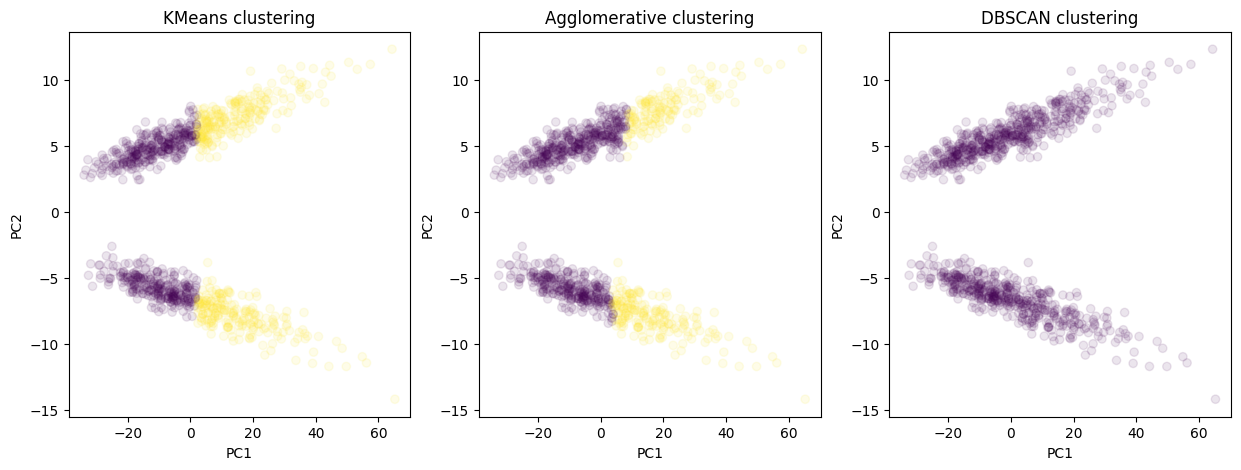

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(X[:, 0], X[:, 1], c=labels_kmeans, alpha=0.1)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('KMeans clustering')
ax[1].scatter(X[:, 0], X[:, 1], c=labels_agglomerative, alpha=0.1)
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Agglomerative clustering')
ax[2].scatter(X[:, 0], X[:, 1], c=labels_dbscan, alpha=0.1)
ax[2].set_xlabel('PC1')
ax[2].set_ylabel('PC2')
ax[2].set_title('DBSCAN clustering')
plt.show()


## Discussion (10 pts):

#### 8. The linear regression model was able to outperform the much more complex deep learning models (neural networks). This indicates that there is a linear bias in the data. What is the linear bias present in our sequence data? How can you tell? **Support your answer with evidence in the form of a plot.** (4 pts)

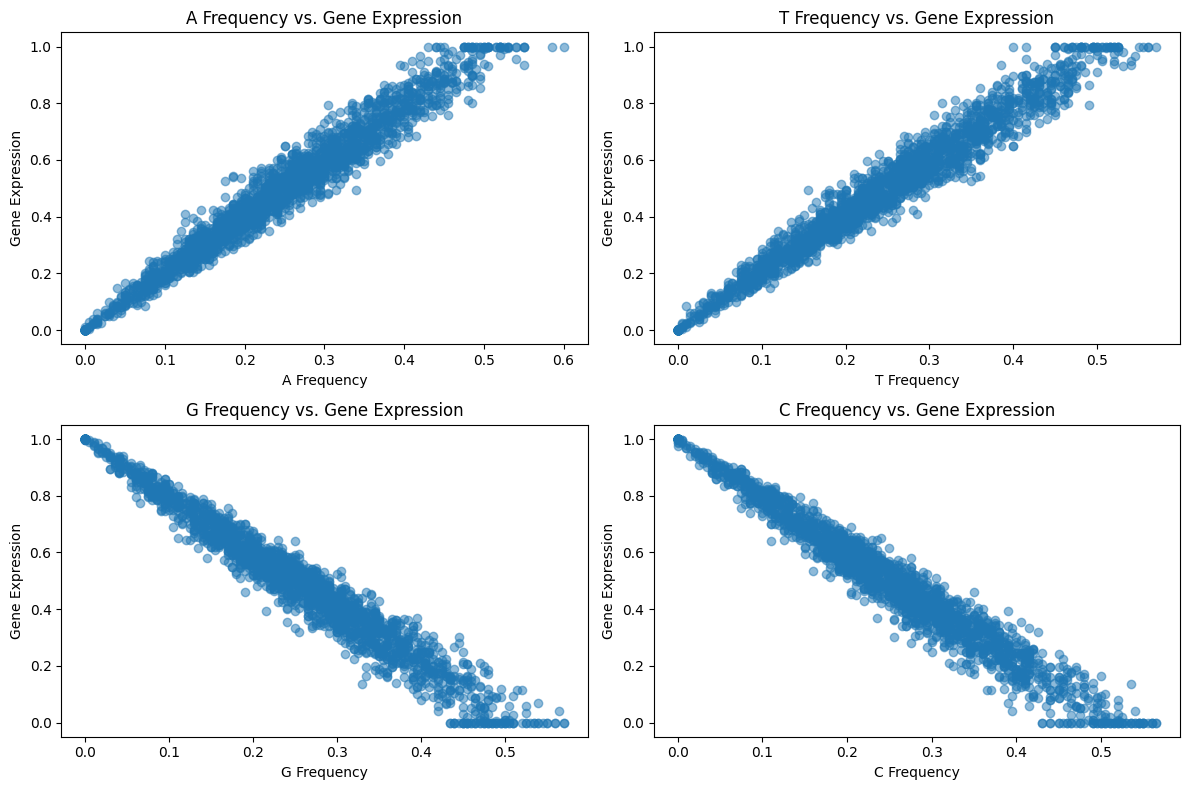

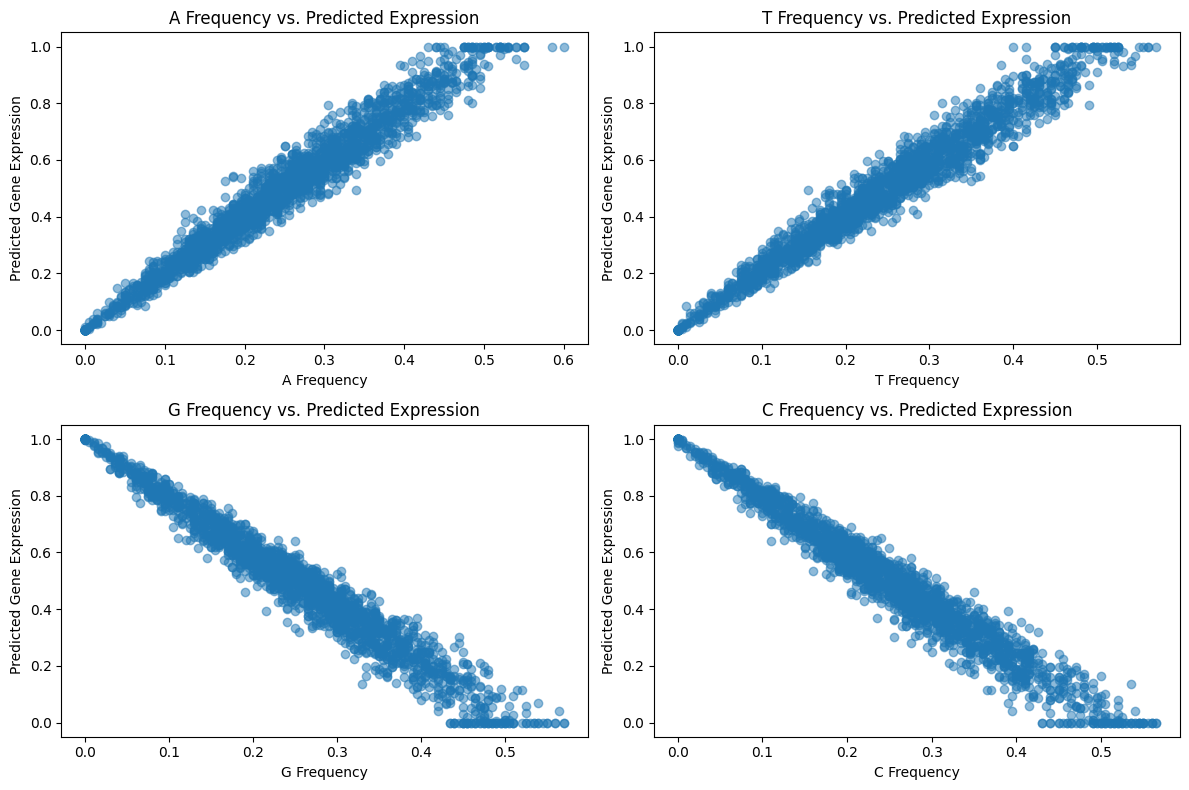

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X_test' contains the one-hot encoded promoter sequences
# and 'lb' is the LabelBinarizer object

nucleotides = ['A', 'T', 'G', 'C']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 figure

for i, nucleotide in enumerate(nucleotides):
    row = i // 2  # Calculate subplot row index
    col = i % 2   # Calculate subplot column index

    # Calculate nucleotide frequency for each sequence
    nucleotide_freq = np.mean(X_test[:, :, lb.classes_.tolist().index(nucleotide)], axis=1)

    # Scatter plot: nucleotide frequency vs. actual expression
    axes[row, col].scatter(nucleotide_freq, y_test, alpha=0.5)
    axes[row, col].set_xlabel(f'{nucleotide} Frequency')
    axes[row, col].set_ylabel('Gene Expression')
    axes[row, col].set_title(f'{nucleotide} Frequency vs. Gene Expression')

plt.tight_layout()  # Adjust subplot spacing
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 figure

for i, nucleotide in enumerate(nucleotides):
    row = i // 2  # Calculate subplot row index
    col = i % 2   # Calculate subplot column index

    # Calculate nucleotide frequency for each sequence
    nucleotide_freq = np.mean(X_test[:, :, lb.classes_.tolist().index(nucleotide)], axis=1)

    # Scatter plot: nucleotide frequency vs. predicted expression
    axes[row, col].scatter(nucleotide_freq, y_pred, alpha=0.5)  # Use y_pred here
    axes[row, col].set_xlabel(f'{nucleotide} Frequency')
    axes[row, col].set_ylabel('Predicted Gene Expression')
    axes[row, col].set_title(f'{nucleotide} Frequency vs. Predicted Expression')

plt.tight_layout()  # Adjust subplot spacing
plt.show()




#### Q10. You can use the following code to perform t-SNE dimensionality reduction on your single-cell RNA-seq data. Do so and repeat your clustering analysis using the t-SNE reduced data. How do the results compare to the PCA reduced data (reproduce the clustering plots but now done on TSNE) and what does this imply about the data? (2 pts)

In [26]:
from sklearn.manifold import TSNE
# perform t-SNE
perplexity = 8 # Note that the perplexity is a hyperparameter that you can tune, you should look into what it does and how to tune it
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
X_tsne = tsne.fit_transform(X)

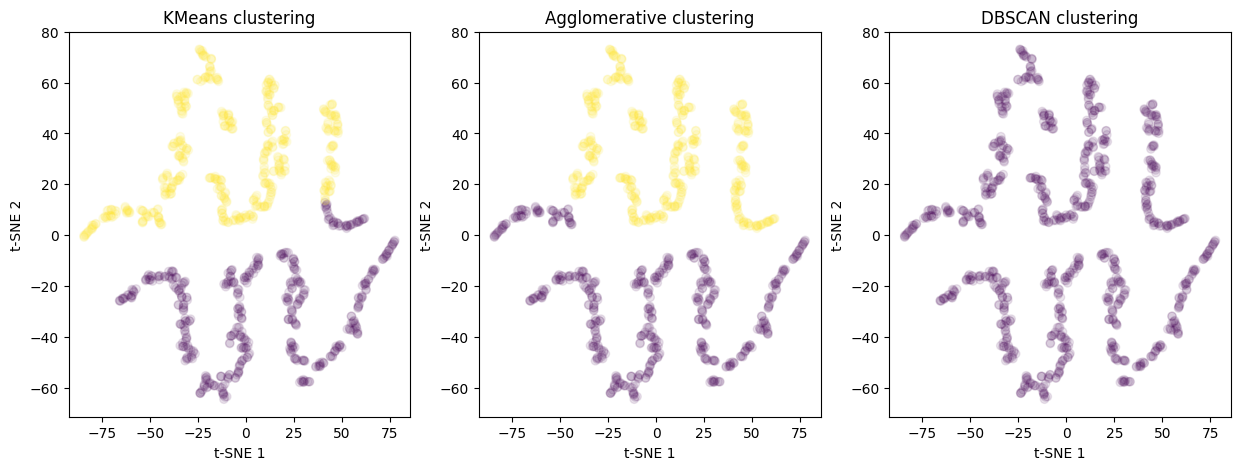

In [27]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_tsne)
labels_kmeans = kmeans.labels_

agglomerative = AgglomerativeClustering(n_clusters=2)
labels_agglomerative = agglomerative.fit_predict(X_tsne)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1).fit(X_tsne)
labels_dbscan = dbscan.labels_


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_kmeans, alpha=0.1)
ax[0].set_xlabel('t-SNE 1')
ax[0].set_ylabel('t-SNE 2')
ax[0].set_title('KMeans clustering')
ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_agglomerative, alpha=0.1)
ax[1].set_xlabel('t-SNE 1')
ax[1].set_ylabel('t-SNE 2')
ax[1].set_title('Agglomerative clustering')
ax[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_dbscan, alpha=0.1)
ax[2].set_xlabel('t-SNE 1')
ax[2].set_ylabel('t-SNE 2')
ax[2].set_title('DBSCAN clustering')
plt.show()